In [78]:
### 주택 데이터셋으로 LinearRegression 구현해보기

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


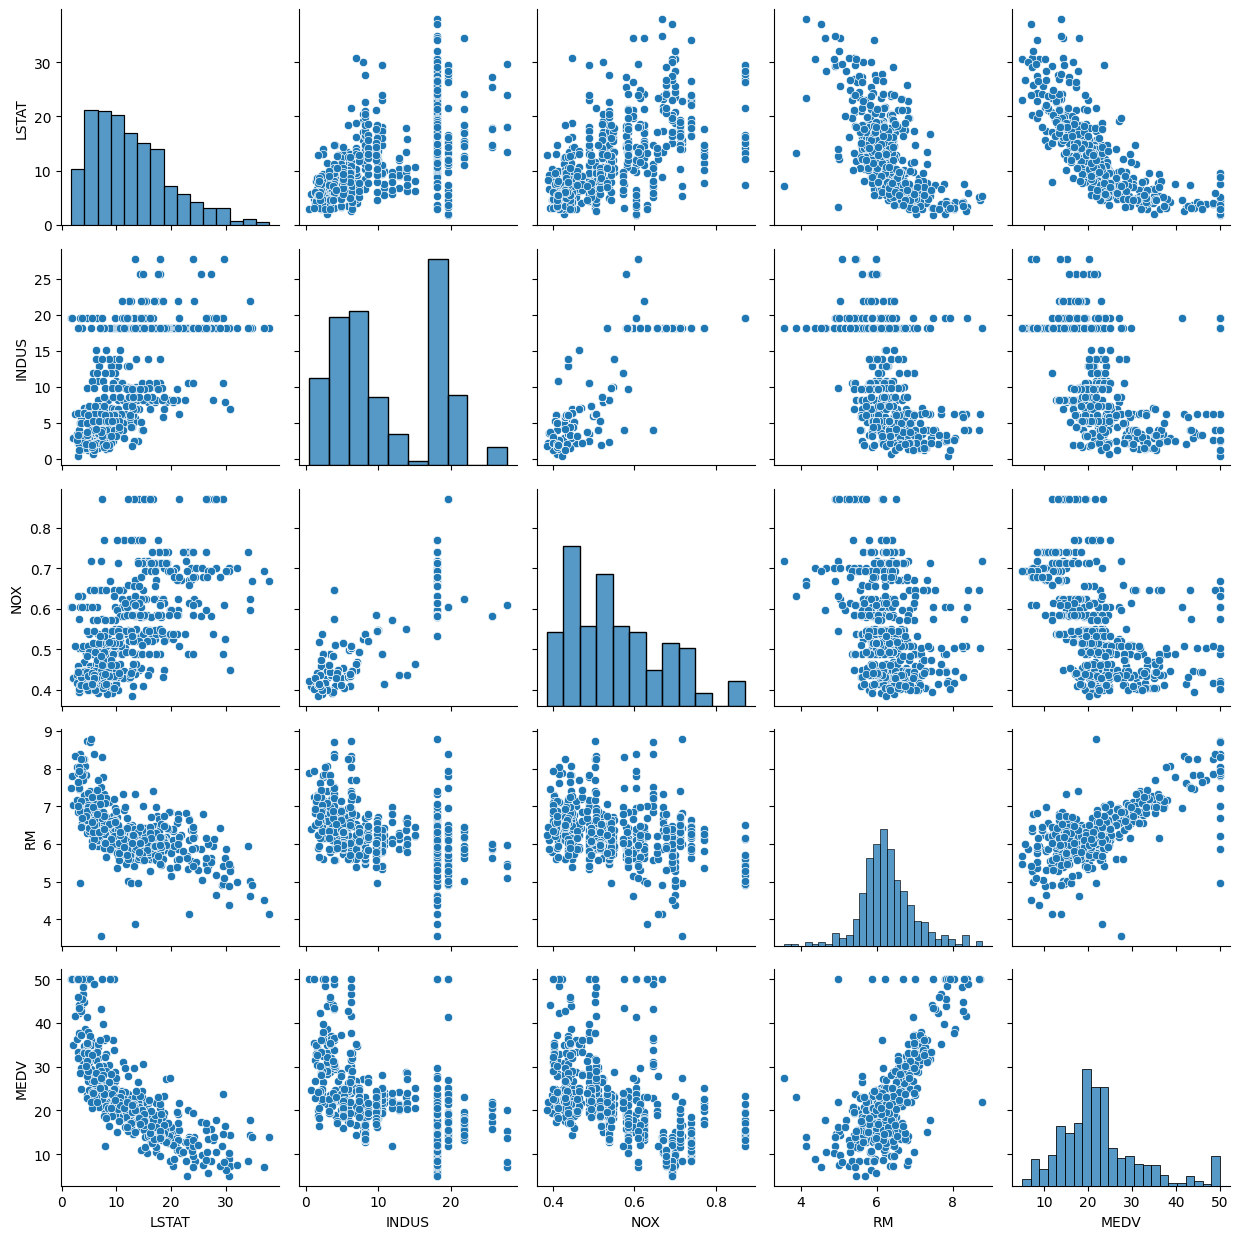

In [79]:
### EDA를 통해 무작정 회귀를 하지않고, 데이터의 상관관계 파악해보기

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)

plt.tight_layout()
plt.show()

# EDA는 매우 중요함
# 머신러닝을 돌리기전에 일단 데이터를 보고 어떤 형태를 가지고 있고, 특성간의 상관관계를 파악해서
# 어떤 모델을 사용할건지, 상관관계가 거의 없다면 모델을 돌려도 유의미한 결과는 나오지 않는구나 등등
# 훈련중에 필요한 여러가지 정보를 미리 얻어가서 훈련할때 더 빠르게 결과를 낼 수 있음.

### 그래프를 보면 벌써부터 상관관계가 아에 없는 특성들도 보이고, 2차원 곡선으로 잘 표현될만한것, 1차원으로도 충분한 것 등등
### 여러 정보를 미리 알 수 있음.

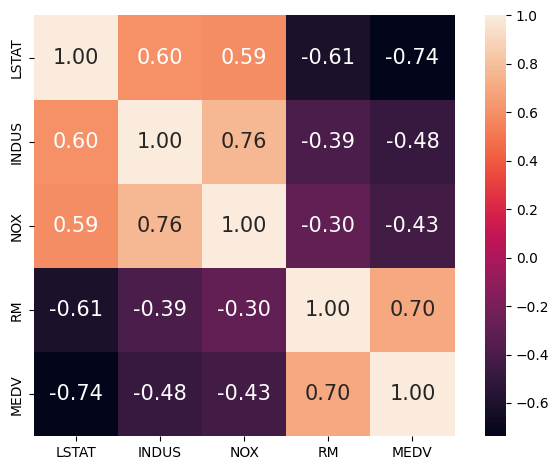

In [80]:
### 위에서 본 특성들간의 그래프를 공분산 계수로 나타내보기
import numpy as np


cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

# 공분산 계수가 높으면 높을수록 훈련할 타겟 변수가 명확하단것임.

# -0.74를 띄는 저 특성이나, 0.70을 띄는 저 특성을 선택해서 모델을 학습시키면 유의미한 결과를 뽑아낼 가능성이 높음.

In [81]:
### Linear Regression을 밑바닥부터 구현

class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        self.cost = []
        
        for i in range(self.n_iter):
            output = self.net_input(X) # pred 값
            errors = (y - output) # 오차
            self.w[1:] += self.eta * X.T.dot(errors)
            self.w[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost.append(cost)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self, X):
        return self.net_input(X)

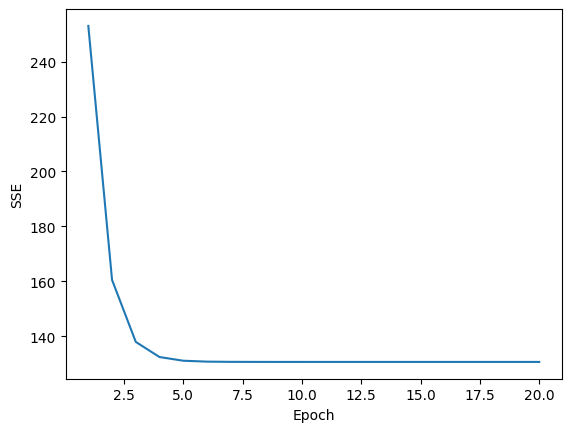

In [82]:
### 한번 학습시켜보기
from sklearn.preprocessing import StandardScaler

X = df[['RM']].values
y = df['MEDV'].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

# 결과를 보면 5 epoch 정도에 수렴한 걸 볼 수 있음.


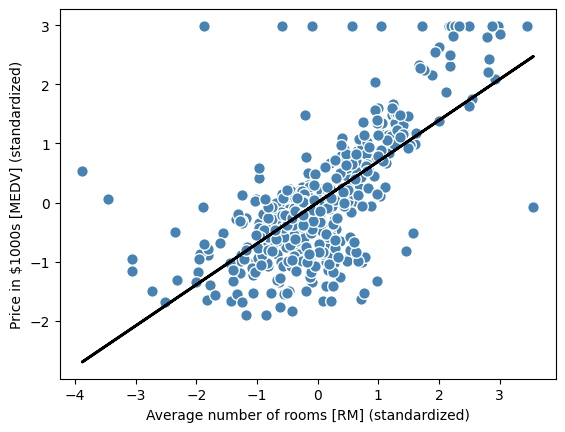

$1,000 단위 가격: 10.840


C:\Users\조승현\AppData\Local\Temp\ipykernel_5960\2246458791.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("$1,000 단위 가격: %.3f" % sc_y.inverse_transform([price_std]))


In [83]:
### 참고) 데이터와 모델의 그래프 그려보기

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

plt.show()

# 아까 모델을 훈련시킬때 표준화 해서 X, Y축이 스케일링 된 모습이지만,
# inverse_transfrom() 메서드를 통해 원래대로 다시 되돌릴 수 있음.

# 역으로 되돌린 후 가격 측정
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("$1,000 단위 가격: %.3f" % sc_y.inverse_transform([price_std]))

In [84]:
### 사이킷런의 모델 가져다 써보기 

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)

기울기: 9.102
절편: -34.671


In [85]:
### 참고) Normal equation을 통해서 모델의 기울기와 절편을 동일하게 구하는 방법

# 1로 채워진 열 벡터 추가
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('기울기: %.3f' % w[1])
print('절편: %.3f' % w[0])

### 이 방법은 최적의 해를 구하는게 보장되어있지만, 특성이 많아져서 행렬이 커지면,
### 역행렬을 구하는 비용이 너무 많이 들음..
### 비추천!

기울기: 9.102
절편: -34.671


In [86]:
### RANSAC을 이용한 outlier의 영향을 줄일수 있는 방법

from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50, loss='absolute_error',
                         residual_threshold=5.0, random_state=0)
ransac.fit(X, y)

print(ransac.predict(X))

[26.49033113 24.83721677 33.0383815  31.03102836 32.63047017 24.93382735
 20.44680267 22.16432408 16.35695481 20.3609266  24.36489839 20.41459914
 19.12645809 19.77052862 21.34850141 18.5360601  19.62024549 20.21064348
 14.47841577 17.38746766 15.70214978 19.94228076 21.84228882 18.31063542
 19.5021659  16.01345053 18.31063542 20.82251048 25.63157042 27.5530475
 17.23718454 21.0908732  19.78126312 17.10837043 21.34850141 19.59877647
 18.61120166 18.70781224 19.95301526 26.70502131 31.31012558 28.58356035
 22.13212055 22.58296992 21.05866967 16.90441476 18.02080368 20.64002383
 13.86654877 16.04565406 19.92081174 21.55245708 25.80332257 20.29651955
 19.11572358 33.72539007 24.42930544 29.07734775 21.87449234 19.53436942
 17.53775078 19.95301526 25.21292458 28.49768428 32.16888629 23.43099612
 18.03153819 19.00837849 15.95977799 19.08352005 24.79427874 19.89934272
 21.01573164 22.94794322 23.24850947 23.38805808 23.31291652 21.8208198
 22.80839461 18.96544045 28.12197647 26.96264952 23.5

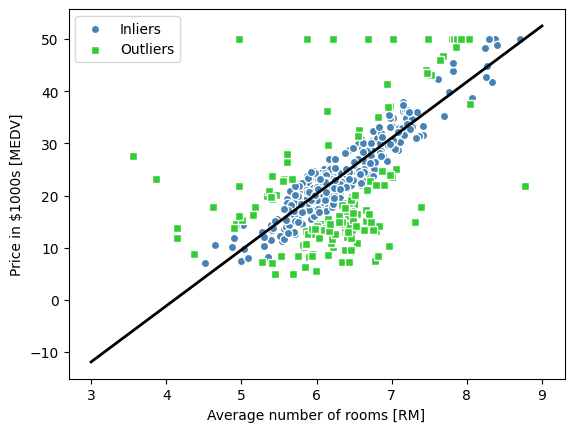

기울기: 10.735
절편: -44.089


C:\Users\조승현\AppData\Local\Temp\ipykernel_5960\936197683.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('기울기: %.3f' % ransac.estimator_.coef_)


In [87]:
### RANSAC 모델을 훈련하고 나온 결과를 통해서 outlier와 inlier를 구분지을 수있음.

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

plt.show()

# 결과로 나온 모델의 직선은 굉장히 데이터를 잘 표현하고 있음.

# 별개로, GD로 구한 결과와 다른 기울기와 절편을 띄고있음.
print('기울기: %.3f' % ransac.estimator_.coef_)
print('절편: %.3f' % ransac.estimator_.intercept_)

In [88]:
### 회귀모델의 성능 평가

# 분류모델에서 성능 평가는 train set / valid set -> test set으로 진행했지만,
# 회귀모델에서는 test set으로 성능을 평가할 수도 있지만, 다른 방법으로도 성능을 평가 할 수 있음.

# 이번엔 단변량 선형회귀가 아닌 다변량으로 모델을 훈련시켜주고, 
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

# 제일 기본적인 모델 평가

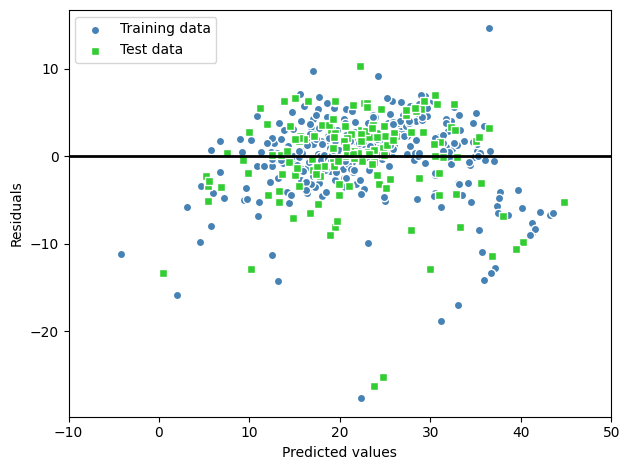

In [89]:
### 잔차 그래프를 통한 모델 평가

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()


# 좋은 회귀모델이면 저 중앙선 (잔차가 0이 되는 부분) 주변으로 샘플들이 모여있어야 잘 학습했다고 볼 수 있음.

In [90]:
### MSE를 통한 성능평가

from sklearn.metrics import mean_squared_error

print("훈련 mse = %.3f, 테스트 mse = %.3f" 
      %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

# 결과값을 보면 훈련셋에 대해선 잔차가 낮지만, 테스트셋에 대해선 잔차가 전반적으로 높은걸 볼 수 있음..
# Overfitting이 걸렸음.

훈련 mse = 19.958, 테스트 mse = 27.196


In [91]:
### 결정계수를 통한 성능평가

from sklearn.metrics import r2_score

print('훈련 R2 = %.3f, 테스트 R2 = %.3f' 
      %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

# 결정계수는 y값이 평균을 기준으로 흩어져있던 정도중 (y값의 범위) X와의 선형적 관계로 R2%만큼은 설명할 수 있었다!
# 라는 뜻임

훈련 R2 = 0.765, 테스트 R2 = 0.673


In [92]:
### 릿지, 라소와 엘라스틱 넷

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

ridge = Ridge(alpha = 1.0)
lasso = Lasso(alpha = 1.0)
elastic = ElasticNet(alpha = 1.0, l1_ratio=0.5)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic.fit(X_train, y_train)

print("릿지의 w 계수: ", ridge.coef_)
print("라쏘의 w 계수: ", lasso.coef_)
print("엘라스틱넷의 w 계수: ", elastic.coef_)

# 확실히 릿지는 계수를 0에 가깝게 만들긴 하지만 완전히 0으로 만들진 않고,
# 라쏘는 w 벡터를 희소하게 만들기 때문에 0으로 만들어진 계수들이 많고,
# 엘라스틱넷은 릿지와 라쏘의 절충안이기 때문에 적절히 섞여있다는걸 알 수 있음.

릿지의 w 계수:  [-1.18308575e-01  4.61259764e-02 -2.08626416e-02  2.45868617e+00
 -8.25958494e+00  3.89748516e+00 -1.79140171e-02 -1.39737175e+00
  2.18432298e-01 -1.16338128e-02 -9.31711410e-01  7.26996266e-03
 -4.94046539e-01]
라쏘의 w 계수:  [-0.06586193  0.04832933 -0.          0.         -0.          0.86898466
  0.01217999 -0.75109378  0.2000743  -0.01395062 -0.84602363  0.00668818
 -0.73266568]
엘라스틱넷의 w 계수:  [-0.08344408  0.05179376 -0.01702468  0.         -0.          0.90890973
  0.01218953 -0.83010765  0.23558231 -0.01502425 -0.84881663  0.00687826
 -0.72504946]


In [93]:
### 다항 회귀를 통해 데이터들이 비선형의 형태를 띄었을때 대처하기

from sklearn.preprocessing import PolynomialFeatures

X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

lr = LinearRegression()
pr = LinearRegression()
quad = PolynomialFeatures(degree=2) # degree 인자를 통해 몇차항인지 정할 수 있음.

X_quad = quad.fit_transform(X)

lr.fit(X, y)
pr.fit(X_quad, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


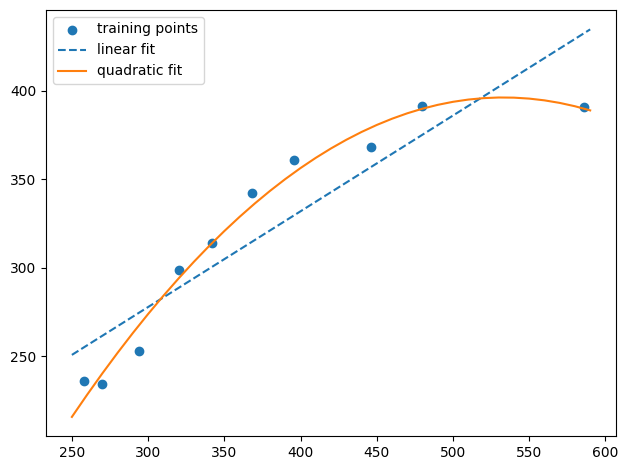

In [94]:
### 학습한 모델에 데이터 넣어보고, 결과 보기

# 선형 특성 학습
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# 이차항 특성 학습
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quad.fit_transform(X_fit))

# 결과 그래프
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 같은 X를 넣어도 다항식 항을 넣지 않은 단순 LR은 데이터를 잘 표현하지 못하는 Underfitting 상태이지만,
# 다항회귀는 데이터를 매우 잘 표현하고 있는걸 알 수있음.

In [95]:
### 한번 MSE와 R2_score로 모델 평가해보기

y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('훈련 MSE 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('훈련 R^2 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

# MSE나 R2_Score 둘다 다항회귀 모델이 훨씬 좋은걸 알 수 있음.
# 참고로 분류모델의 .score 메서드는 정확도가 기본 평가 지표지만, 회귀모델은 기본 평가 지표가 R2_Score임.

훈련 MSE 비교 - 선형 모델: 569.780, 다항 모델: 61.330
훈련 R^2 비교 - 선형 모델: 0.832, 다항 모델: 0.982


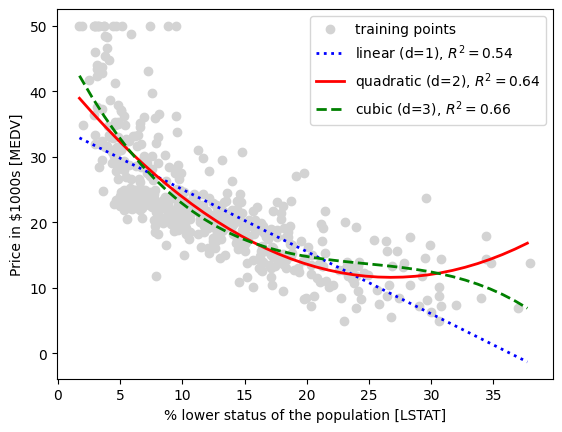

In [96]:
### 실제 주택 데이터셋을 이용해서 비선형 관계 모델링 해보기

X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# 이번엔 1차 / 2차 / 3차로 특성을 변환했을때, 한번 비교해보기!
quad = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quad.fit_transform(X)
X_cubic = cubic.fit_transform(X)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quad.fit_transform(X_fit))
quad_r2 = regr.score(X_quad, y)

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = regr.score(X_cubic, y)

# 결과 그래프
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quad_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

plt.show()

# 결과를 보면 확실히 차수를 늘릴때마다 모델이 데이터셋을 조금 더 잘 표현하는걸 알 수 있지만,
# 이렇게 무한히 차원을 늘리게되면, Overfitting 문제가 존재해서 실제로 사용할땐, 교차검증과 그리드 서치를 이용해서
# 하이퍼파라미터를 최적화 하는걸 추천.

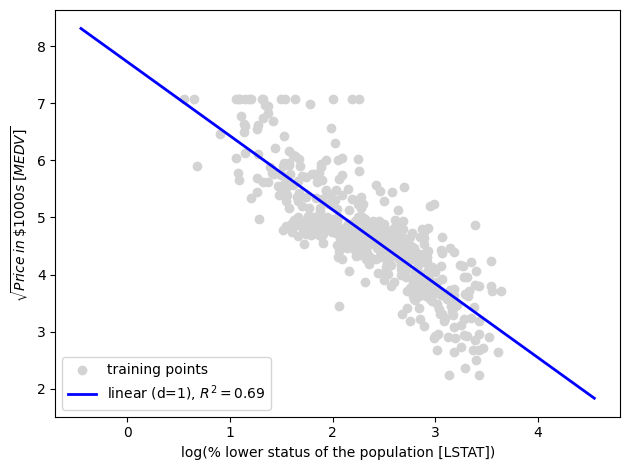

In [97]:
### 위에서는 X의 차원을 늘려서 모델이 데이터셋을 더 잘 설명하게 했다면,
### 아에 특성의 스케일을 조정해서 모델은 단순하지만, 데이터를 잘 설명할 수 있게 할 수 있음.
### >>> 이런걸 하러면 당연히 EDA를 통해 데이터가 어떤 분포인지 잘 봐야됨!!

X = df[['LSTAT']].values
y = df['MEDV'].values

# 특성을 변환
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# 특성 범위 만들기
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# 결과 그래프 그리기
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


### 결과를 보면 아까는 2차원 / 3차원 모델이 데이터셋을 잘 설명했지만, 데이터의 스케일을 조절하니
### Linear model로도 충분히 잘 표현하는걸 알 수 있음!

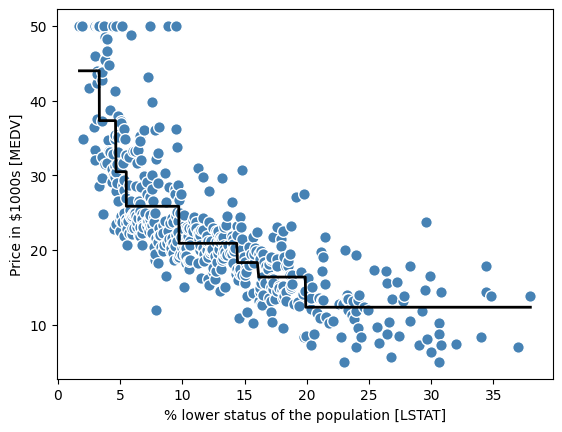

In [ ]:
### 결정트리 회귀 

from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df[['MEDV']].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

# 트리 기반 모델은 훈련세트 범위 밖의 데이터에 대해서 예측하지 못함.
# 그래서 그래프를 보면, LSTAT이 40이상인 데이터에 대해서는 Price를 12.xxx로 전부 예측하는걸 볼 수 있음.

In [ ]:
### 랜덤 포레스트 회귀
from sklearn.ensemble import RandomForestRegressor

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error', random_state=1)
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

# 결과값을 보면 train set에 overfitting이 걸려있다는걸 볼 수 있음.
# 하지만, test set에서도 굉장히 r2_score가 높음..



훈련 MSE: 1.644, 테스트 MSE: 11.085
훈련 R^2: 0.979, 테스트 R^2: 0.877


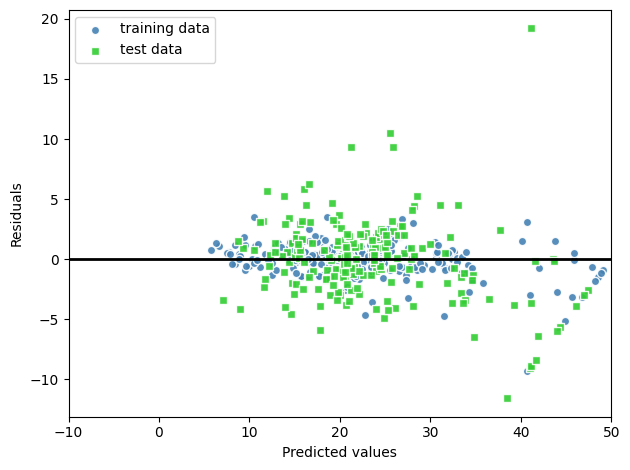

In [103]:
### 랜덤 포레스트의 잔차 그래프

plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()